#  E-commerce Sales Analysis

This notebook analyzes orders and revenue trends and identifies top products.

## 1. Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets (make sure these files exist in your data/ folder)
orders = pd.read_csv('../data/olist_orders_dataset.csv')
order_items = pd.read_csv('../data/olist_order_items_dataset.csv')

print("orders:", orders.shape)
print("order_items:", order_items.shape)

orders.head()

orders: (99441, 8)
order_items: (112650, 7)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## 2. Data Cleaning & Feature Creation

In [2]:
# Convert purchase timestamp to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Create month column
orders['month'] = orders['order_purchase_timestamp'].dt.to_period('M').astype(str)

# Quick check for missing values
print("Missing values in orders:")
print(orders.isna().sum().sort_values(ascending=False).head(10))

print("\nMissing values in order_items:")
print(order_items.isna().sum().sort_values(ascending=False).head(10))

orders[['order_id', 'customer_id', 'order_purchase_timestamp', 'month']].head()

Missing values in orders:
order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_estimated_delivery_date       0
month                               0
dtype: int64

Missing values in order_items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


,order_id,customer_id,order_purchase_timestamp,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02


## 3. Monthly Orders Analysis

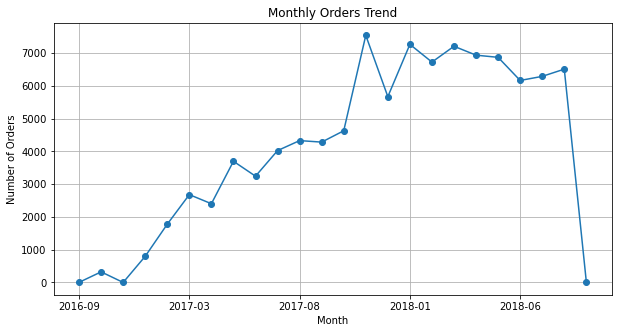

In [3]:
# Calculate monthly orders
monthly_orders = orders.groupby('month')['order_id'].count()

# Remove last month (incomplete data causing sudden drop)
monthly_orders = monthly_orders[:-1]

# Plot
plt.figure(figsize=(10,5))
monthly_orders.plot(marker='o')
plt.title("Monthly Orders Trend")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

## 4. Monthly Revenue Analysis

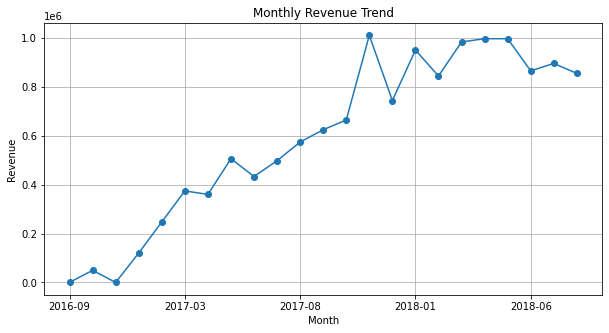

In [4]:
# Merge orders and order_items
sales_data = orders.merge(order_items, on='order_id')

# Calculate monthly revenue
monthly_revenue = sales_data.groupby('month')['price'].sum()

# Remove last month (incomplete)
monthly_revenue = monthly_revenue[:-1]

# Plot
plt.figure(figsize=(10,5))
monthly_revenue.plot(marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid()
plt.show()

## 5. Top Products Analysis

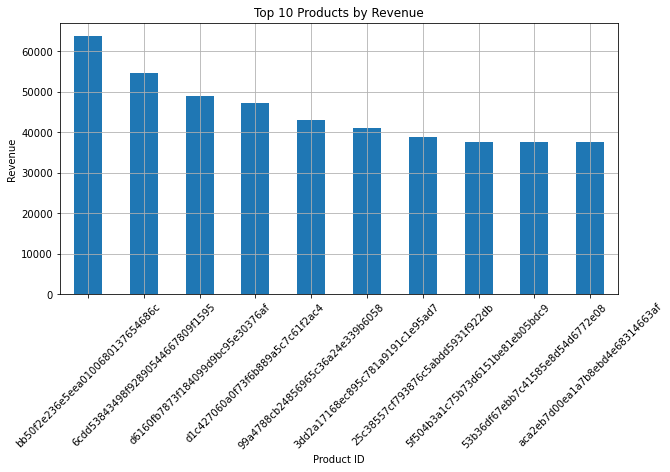

In [5]:
# Top 10 products by revenue
top_products = sales_data.groupby('product_id')['price'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product ID")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid()
plt.show()

## 6. Key Insights

- Revenue and order volume show a steady increase over time, indicating growing customer demand.

- Both revenue and orders peak in November, likely due to seasonal events such as holiday sales (e.g., Black Friday).

- A noticeable drop in August suggests a seasonal slowdown in customer activity.

- There is a strong relationship between number of orders and revenue, meaning growth is driven by higher sales volume.

- Sales are concentrated among a few top-performing products, indicating key revenue drivers.

## 💡 Business Recommendations

- Increase inventory and marketing efforts before November to maximize peak season revenue

- Introduce promotions or discounts during low-performing months like August

- Focus on top-performing products to drive higher sales

- Implement customer retention strategies to increase repeat purchases